In [1]:
from qiskit import *
import numpy as np
%matplotlib inline

In [2]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr,cr)

In [3]:
circuit.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
c0: 4/

In [4]:
circuit.x(qr[0])
circuit.x(qr[1])

circuit.draw()

┌───┐
q0_0: ┤ X ├
      ├───┤
q0_1: ┤ X ├
      └───┘
q0_2: ─────
           
q0_3: ─────
           
c0: 4/═════

In [5]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit,backend=simulator)
result=job.result()
out=result.get_statevector(circuit, decimals=3)
print(out)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [6]:
circuit.barrier()
#circuit.measure(qr[0],cr[0])
#circuit.measure(qr[1],cr[1])
#circuit.measure(qr[2],cr[2])
#circuit.measure(qr[3],cr[3])
#circuit.barrier()

#simulator = Aer.get_backend('qasm_simulator')
#job = execute(circuit,backend=simulator)
#result=job.result()
#counts=result.get_counts()
#print(counts)

In [7]:
circuit.draw()

┌───┐ ░ 
q0_0: ┤ X ├─░─
      ├───┤ ░ 
q0_1: ┤ X ├─░─
      └───┘ ░ 
q0_2: ──────░─
            ░ 
q0_3: ──────░─
            ░ 
c0: 4/════════

In [8]:
circuit.rx(np.pi/2,qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.h(qr[3])
circuit.draw()

┌───┐ ░ ┌─────────┐
q0_0: ┤ X ├─░─┤ RX(π/2) ├
      ├───┤ ░ └──┬───┬──┘
q0_1: ┤ X ├─░────┤ H ├───
      └───┘ ░    ├───┤   
q0_2: ──────░────┤ H ├───
            ░    ├───┤   
q0_3: ──────░────┤ H ├───
            ░    └───┘   
c0: 4/═══════════════════

In [9]:
circuit.cx(qr[0],qr[1])
circuit.cx(qr[1],qr[2])
circuit.cx(qr[2],qr[3])
circuit.draw()

┌───┐ ░ ┌─────────┐               
q0_0: ┤ X ├─░─┤ RX(π/2) ├──■────────────
      ├───┤ ░ └──┬───┬──┘┌─┴─┐          
q0_1: ┤ X ├─░────┤ H ├───┤ X ├──■───────
      └───┘ ░    ├───┤   └───┘┌─┴─┐     
q0_2: ──────░────┤ H ├────────┤ X ├──■──
            ░    ├───┤        └───┘┌─┴─┐
q0_3: ──────░────┤ H ├─────────────┤ X ├
            ░    └───┘             └───┘
c0: 4/══════════════════════════════════

In [10]:
theta=0.11
circuit.barrier()
circuit.rz(theta,qr[3])
circuit.barrier()
circuit.draw()

┌───┐ ░ ┌─────────┐                ░              ░ 
q0_0: ┤ X ├─░─┤ RX(π/2) ├──■─────────────░──────────────░─
      ├───┤ ░ └──┬───┬──┘┌─┴─┐           ░              ░ 
q0_1: ┤ X ├─░────┤ H ├───┤ X ├──■────────░──────────────░─
      └───┘ ░    ├───┤   └───┘┌─┴─┐      ░              ░ 
q0_2: ──────░────┤ H ├────────┤ X ├──■───░──────────────░─
            ░    ├───┤        └───┘┌─┴─┐ ░ ┌──────────┐ ░ 
q0_3: ──────░────┤ H ├─────────────┤ X ├─░─┤ RZ(0.11) ├─░─
            ░    └───┘             └───┘ ░ └──────────┘ ░ 
c0: 4/════════════════════════════════════════════════════

In [11]:
circuit.cx(qr[2],qr[3])
circuit.cx(qr[1],qr[2])
circuit.cx(qr[0],qr[1])
circuit.draw()

┌───┐ ░ ┌─────────┐                ░              ░                
q0_0: ┤ X ├─░─┤ RX(π/2) ├──■─────────────░──────────────░─────────────■──
      ├───┤ ░ └──┬───┬──┘┌─┴─┐           ░              ░           ┌─┴─┐
q0_1: ┤ X ├─░────┤ H ├───┤ X ├──■────────░──────────────░────────■──┤ X ├
      └───┘ ░    ├───┤   └───┘┌─┴─┐      ░              ░      ┌─┴─┐└───┘
q0_2: ──────░────┤ H ├────────┤ X ├──■───░──────────────░───■──┤ X ├─────
            ░    ├───┤        └───┘┌─┴─┐ ░ ┌──────────┐ ░ ┌─┴─┐└───┘     
q0_3: ──────░────┤ H ├─────────────┤ X ├─░─┤ RZ(0.11) ├─░─┤ X ├──────────
            ░    └───┘             └───┘ ░ └──────────┘ ░ └───┘          
c0: 4/═══════════════════════════════════════════════════════════════════

In [12]:
circuit.barrier()
circuit.rx(-(np.pi/2),qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.h(qr[3])
circuit.barrier()
circuit.draw()

┌───┐ ░ ┌─────────┐                ░              ░                 ░ »
q0_0: ┤ X ├─░─┤ RX(π/2) ├──■─────────────░──────────────░─────────────■───░─»
      ├───┤ ░ └──┬───┬──┘┌─┴─┐           ░              ░           ┌─┴─┐ ░ »
q0_1: ┤ X ├─░────┤ H ├───┤ X ├──■────────░──────────────░────────■──┤ X ├─░─»
      └───┘ ░    ├───┤   └───┘┌─┴─┐      ░              ░      ┌─┴─┐└───┘ ░ »
q0_2: ──────░────┤ H ├────────┤ X ├──■───░──────────────░───■──┤ X ├──────░─»
            ░    ├───┤        └───┘┌─┴─┐ ░ ┌──────────┐ ░ ┌─┴─┐└───┘      ░ »
q0_3: ──────░────┤ H ├─────────────┤ X ├─░─┤ RZ(0.11) ├─░─┤ X ├───────────░─»
            ░    └───┘             └───┘ ░ └──────────┘ ░ └───┘           ░ »
c0: 4/══════════════════════════════════════════════════════════════════════»
                                                                            »
«      ┌──────────┐ ░ 
«q0_0: ┤ RX(-π/2) ├─░─
«      └──┬───┬───┘ ░ 
«q0_1: ───┤ H ├─────░─
«         ├───┤     ░ 
«q0_2: ───┤ H ├─────░─
«         ├───┤     ░ 
«q0_3: ───┤ H ├─────░─
«         └───┘     ░ 
«c0: 4/═══════════════
«

In [13]:
circuit.measure(qr[0],cr[0])
circuit.measure(qr[1],cr[1])
circuit.measure(qr[2],cr[2])
circuit.measure(qr[3],cr[3])
circuit.barrier()

circuit.draw()

┌───┐ ░ ┌─────────┐                ░              ░                 ░ »
q0_0: ┤ X ├─░─┤ RX(π/2) ├──■─────────────░──────────────░─────────────■───░─»
      ├───┤ ░ └──┬───┬──┘┌─┴─┐           ░              ░           ┌─┴─┐ ░ »
q0_1: ┤ X ├─░────┤ H ├───┤ X ├──■────────░──────────────░────────■──┤ X ├─░─»
      └───┘ ░    ├───┤   └───┘┌─┴─┐      ░              ░      ┌─┴─┐└───┘ ░ »
q0_2: ──────░────┤ H ├────────┤ X ├──■───░──────────────░───■──┤ X ├──────░─»
            ░    ├───┤        └───┘┌─┴─┐ ░ ┌──────────┐ ░ ┌─┴─┐└───┘      ░ »
q0_3: ──────░────┤ H ├─────────────┤ X ├─░─┤ RZ(0.11) ├─░─┤ X ├───────────░─»
            ░    └───┘             └───┘ ░ └──────────┘ ░ └───┘           ░ »
c0: 4/══════════════════════════════════════════════════════════════════════»
                                                                            »
«      ┌──────────┐ ░ ┌─┐          ░ 
«q0_0: ┤ RX(-π/2) ├─░─┤M├──────────░─
«      └──┬───┬───┘ ░ └╥┘┌─┐       ░ 
«q0_1: ───┤ H ├─────░──╫─┤M├───────░─
«         ├───┤     ░  ║ └╥┘┌─┐    ░ 
«q0_2: ───┤ H ├─────░──╫──╫─┤M├────░─
«         ├───┤     ░  ║  ║ └╥┘┌─┐ ░ 
«q0_3: ───┤ H ├─────░──╫──╫──╫─┤M├─░─
«         └───┘     ░  ║  ║  ║ └╥┘ ░ 
«c0: 4/════════════════╩══╩══╩══╩════
«                      0  1  2  3

In [14]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit,backend=simulator,shots=1024)
result=job.result()
counts_2=result.get_counts()
print(counts_2)

{'0011': 1023, '1100': 1}


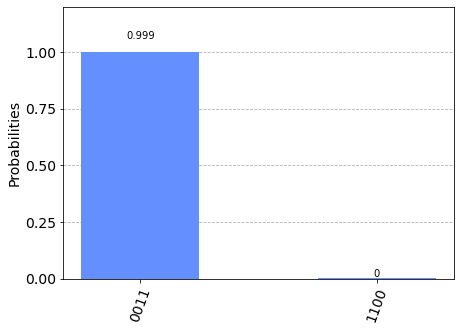

In [15]:
from qiskit.visualization import plot_histogram
plot_histogram(counts_2)

In [16]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_santiago')
job_q = execute(circuit, backend=qcomp, shots=1024)

/Users/marwa/opt/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [17]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_q)

Job Status: job has successfully run


In [18]:
result_q=job_q.result()

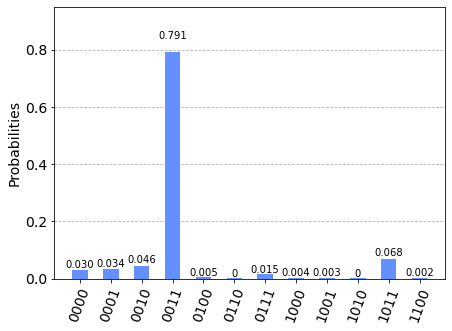

In [19]:
plot_histogram(result_q.get_counts(circuit))